In [2]:
import random
import math
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

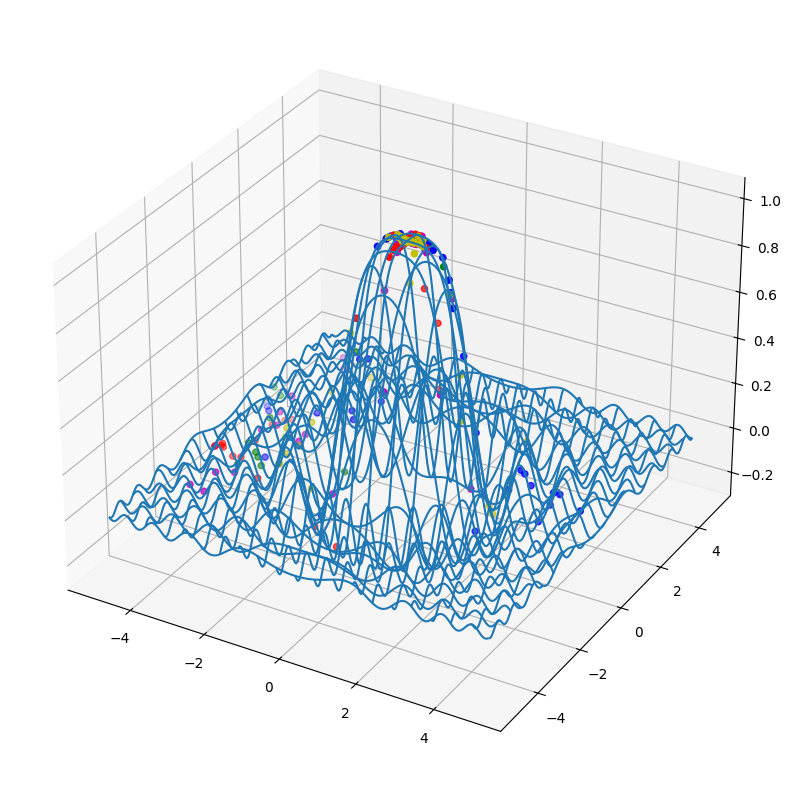

In [45]:
best = {}
last_index = 0
def find_global_best():
    global best
    x = {}
    for k,v in best.items():
        r = (v[0]*v[0]) + (v[1]*v[1])
        x[k] = math.sin(r)/r
    
    y = sorted(x.items(), key = lambda a: a[1])
    return best[y[len(y)-1][0]]
class Bee:
    w = 0.8
    c1 = 0.5
    c2 = 0.5
    
    def __init__(self, x, y, vx, vy, color = 'b'):
        global best
        global last_index
        self.ID = last_index
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.px = x
        self.py = y
        self.trace_x = [x]
        self.trace_y = [y]
        self.trace_z = [self.fitness()]
        self.color = color
   

        best[self.ID] = (self.px,self.py)
        last_index += 1
    def fitness(self, x= None, y = None):
        if x == None and y == None:
            x = self.x
            y = self.y
        r = (x*x) + (y*y)
        return math.sin(r)/r
    def move(self):
        self.x = self.x + self.vx
        self.trace_x.append(self.x)
        self.y = self.y + self.vy
        self.trace_y.append(self.y)
        self.trace_z.append(self.fitness())
        if (self.fitness() > self.fitness(x=self.px, y=self.py)):
            self.px = self.x
            self.py = self.y
            best[self.ID] = (self.px,self.py)
        g = find_global_best()
        vx2 = self.w*self.vx + self.c1*random.random()*(self.px-self.x) + self.c2*random.random()*(g[0]-self.x)
        vy2 = self.w*self.vy + self.c1*random.random()*(self.py-self.y) + self.c2*random.random()*(g[1]-self.y)
        self.vx = vx2
        self.vy = vy2

b1=Bee(random.random()*10-5,random.random()*10-5,random.random()-0.5,random.random()-0.5,color='r')
b2=Bee(random.random()*10-5,random.random()*10-5,random.random()-0.5,random.random()-0.5,color='b')
b3=Bee(random.random()*10-5,random.random()*10-5,random.random()-0.5,random.random()-0.5,color='g')
b4=Bee(random.random()*10-5,random.random()*10-5,random.random()-0.5,random.random()-0.5,color='m')
b5=Bee(random.random()*10-5,random.random()*10-5,random.random()-0.5,random.random()-0.5,color='y')
bees=[b1,b2,b3,b4,b5]
for i in range(1000):
    for b in bees:
        b.move()

X=np.arange(-4.99,5.01,0.05)
Y=np.arange(-4.99,5.01,0.05)
X,Y=np.meshgrid(X,Y)
R=X**2+Y**2
Z=np.sin(R)/R
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')
ax.plot_wireframe(X,Y,Z,rstride=10,cstride=10)
for b in bees:
    ax.scatter(b.trace_x,b.trace_y,b.trace_z,c=b.color)
plt.show()
